## scikit-learn 설치

In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets

### 1. 데이터 수집

In [3]:
# 1차원의 랜덤한 값 300개를 가지는 X를 생성
X = np.random.rand(300, 1)

# 1차원의 랜덤한 값 300개를 가지는 y를 생성
y = 4 + 3 * X + np.random.randn(300, 1)

In [4]:
for i in range(10):
    print(X[i], y[i])

[0.64054601] [3.79182041]
[0.32722338] [5.44755717]
[0.18831345] [5.17964805]
[0.65128051] [7.14693585]
[0.83809426] [7.59423702]
[0.49415628] [3.2560603]
[0.96528295] [6.63554711]
[0.2976836] [4.7064265]
[0.65316687] [5.54036461]
[0.15154078] [4.43933054]


### 2. 데이터 분할

In [5]:
from sklearn.model_selection import train_test_split

# 데이터를 Train / Test - 80 : 20의 비율로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(240, 1)
(60, 1)
(240, 1)
(60, 1)


### 3. Linear Regression 모델 학습

In [6]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 4. 모델 예측

In [7]:
# 학습된 모델을 사용하여 테스트 데이터 예측
y_pred = model.predict(X_test)

for i in range(10):
    print(X_test[i], y_test[i], y_pred[i])

[0.27569146] [4.24189085] [4.87913965]
[0.91201158] [7.34986948] [6.64518943]
[0.53500145] [5.07525029] [5.5988314]
[0.15154078] [4.43933054] [4.5345705]
[0.21212406] [6.23567754] [4.702714]
[0.25166095] [5.76162069] [4.8124451]
[0.38332756] [4.50711486] [5.17787403]
[0.20552474] [4.7662614] [4.68439816]
[0.49415628] [3.2560603] [5.48546929]
[0.32818881] [6.47001379] [5.02484135]


### 5. 모델 평가

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Mean Squared Error 계산
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Mean Absolute Error 계산
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Root Mean Squared Error 계산
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.8335292754798286
Mean Absolute Error: 0.7237250738217041
Root Mean Squared Error: 0.9129782448009528


### 6. 시각화

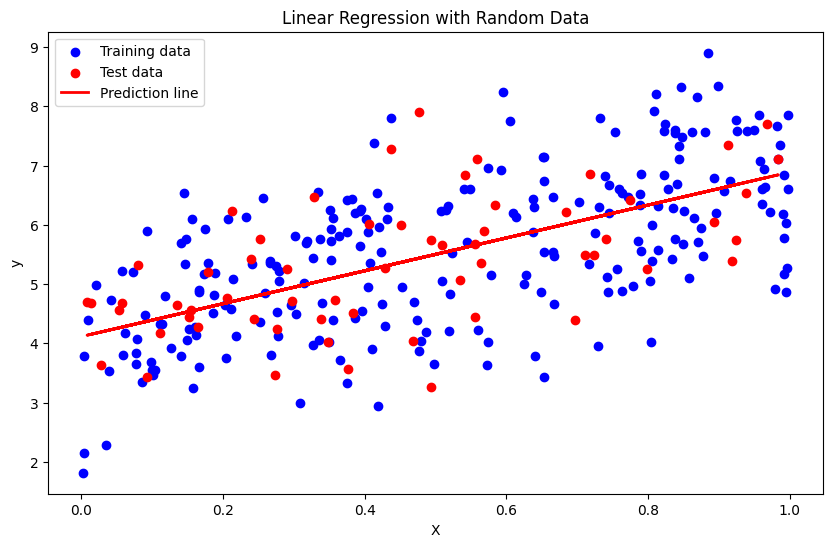

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 학습 데이터 산점도
plt.scatter(X_train, y_train, color='blue', label='Training data')

# 테스트 데이터 산점도
plt.scatter(X_test, y_test, color='red', label='Test data')

# 예측된 직선
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prediction line')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Random Data')
plt.legend()
plt.show()

### 캘리포니아 주택 가격 데이터셋

In [10]:
from sklearn.datasets import fetch_california_housing

# 캘리포니아 주택 가격 데이터셋 로드
# housing = fetch_california_housing()

column_names = [
    'longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms',
    'population', 'households', 'medianIncome', 'medianHouseValue'
]

housing = pd.read_csv('./cal_housing.data', sep=',', header=None, names=column_names)
X = housing.drop('medianHouseValue', axis=1)
y = housing['medianHouseValue']

print (X, y)


# california = fetch_california_housing()
# X = california.data
# y = california.target

# for i in range(10):
#     print(X[i], y[i])

# # 데이터 확인
# print(housing.data.shape)
# print(housing.target.shape)

FileNotFoundError: [Errno 2] No such file or directory: './cal_housing.data'

In [ ]:
print (housing.feature_names)

### 캘리포니아 주택 가격 예측 실습 (Linear Regression)

Mean Squared Error (MSE): 4874978330.451558
Mean Absolute Error (MAE): 50755.43422829597
Root Mean Squared Error (RMSE): 69821.04503981273


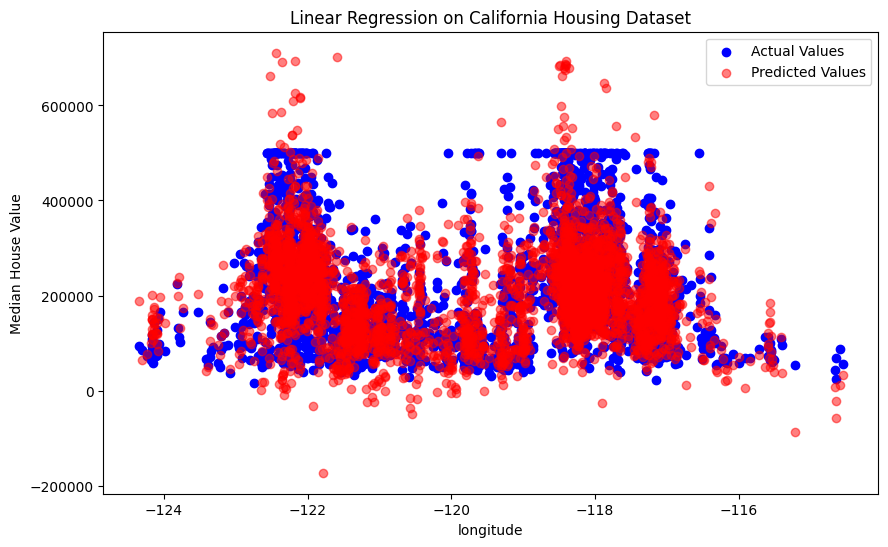

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. 데이터 로드
column_names = [
    'longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms',
    'population', 'households', 'medianIncome', 'medianHouseValue'
]

housing = pd.read_csv('./cal_housing.data', sep=',', header=None, names=column_names)
X = housing.drop('medianHouseValue', axis=1)
y = housing['medianHouseValue']

# 2. 데이터 분할 (Train/Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 3. 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 4. 모델 예측
y_pred = model.predict(X_test)

# 5. 성능 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 6. 시각화 (첫 번째 특성에 대해서만 시각화)
plt.figure(figsize=(10, 6))

# 실제 값과 예측 값 비교
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual Values')
plt.scatter(X_test.iloc[:, 0], y_pred, color='red', label='Predicted Values', alpha=0.5)

plt.xlabel(column_names[0])
plt.ylabel('Median House Value')
plt.title('Linear Regression on California Housing Dataset')
plt.legend()
plt.show()


### 5-fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold

# 2. 5-Fold 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=1)

mse_scores = []
mae_scores = []
rmse_scores = []

# 3. 교차 검증 수행
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 모델 학습
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 모델 예측
    y_pred = model.predict(X_test)

    # 성능 평가
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    mse_scores.append(mse)
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# 평균 및 표준편차 계산
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print(f'5-Fold Cross-Validated Mean Squared Error (MSE): {mean_mse:.2f} ± {std_mse:.2f}')
print(f'5-Fold Cross-Validated Mean Absolute Error (MAE): {mean_mae:.2f} ± {std_mae:.2f}')
print(f'5-Fold Cross-Validated Root Mean Squared Error (RMSE): {mean_rmse:.2f} ± {std_rmse:.2f}')

# 4. 최종 모델 학습 및 예측 (전체 데이터를 사용하여 학습)
model.fit(X, y)
y_pred = model.predict(X)

5-Fold Cross-Validated Mean Squared Error (MSE): 4855046942.37 ± 187635860.86
5-Fold Cross-Validated Mean Absolute Error (MAE): 50811.85 ± 397.17
5-Fold Cross-Validated Root Mean Squared Error (RMSE): 69665.34 ± 1336.92


### X 값들간의 상관관계 분석

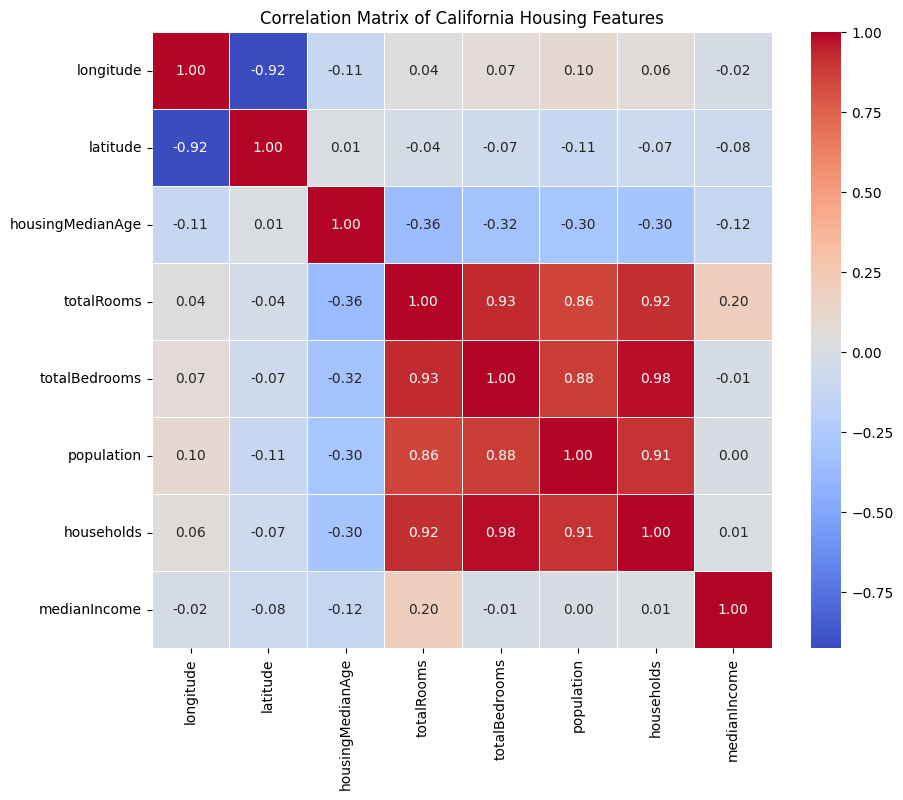

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# 2. 상관관계 계산
correlation_matrix = X.corr()

# 3. 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of California Housing Features')
plt.show()

### Feature Selection (Filters - Pearson Correlation)

Selected features based on correlation threshold: Index(['latitude', 'housingMedianAge', 'totalRooms', 'medianIncome'], dtype='object')
Mean Squared Error (MSE): 6343605353.93375
Mean Absolute Error (MAE): 59398.09947121272
Root Mean Squared Error (RMSE): 79646.75356807552
Feature correlations with the target variable:
latitude           -0.144160
housingMedianAge    0.105623
totalRooms          0.134153
medianIncome        0.688075
dtype: float64


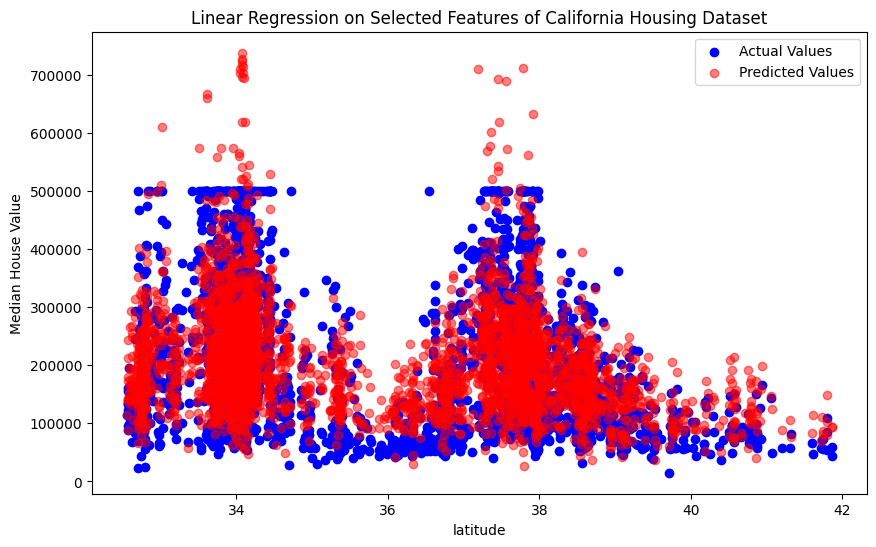

In [ ]:
# 1. 데이터 로드
column_names = [
    'longitude', 'latitude', 'housingMedianAge', 'totalRooms', 'totalBedrooms',
    'population', 'households', 'medianIncome', 'medianHouseValue'
]

housing = pd.read_csv('./cal_housing.data', sep=',', header=None, names=column_names)
X = housing.drop('medianHouseValue', axis=1)
y = housing['medianHouseValue']

# 사용자 정의 상관계수 임계값
correlation_threshold = 0.1  # 사용자가 변경 가능

# 피처와 타겟 변수 간의 상관계수 계산
correlations = X.corrwith(pd.Series(y))

# 상관계수가 임계값을 초과하는 피처만 선택
selected_features = correlations[abs(correlations) > correlation_threshold].index
print("Selected features based on correlation threshold:", selected_features)
X_selected = X[selected_features]

# 2. 데이터 분할 (Train/Test Split)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=1)

# 3. 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 4. 모델 예측
y_pred = model.predict(X_test)

# 5. 성능 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 상관계수 출력
print("Feature correlations with the target variable:")
print(correlations[abs(correlations) > correlation_threshold])

# 6. 시각화 (첫 번째 선택된 특성에 대해서만 시각화)
plt.figure(figsize=(10, 6))

# 실제 값과 예측 값 비교
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual Values')
plt.scatter(X_test.iloc[:, 0], y_pred, color='red', label='Predicted Values', alpha=0.5)

plt.xlabel(selected_features[0])
plt.ylabel('Median House Value')
plt.title('Linear Regression on Selected Features of California Housing Dataset')
plt.legend()
plt.show()